In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [11]:
# TODO 1
# df = ...
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls",index_col=0)
df.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


In [14]:
# TODO 2
# df1 = ...
df1 = df.where(pd.notnull(df), df.mean(numeric_only=True), axis='columns')


In [15]:
# TODO 3
# y = ...
ystr = df1['Genotype'].values
u, y = np.unique(ystr, return_inverse=True)

In [16]:
# TODO 4
# xnames = ...
# X = ...
xnames = df1.columns[:-4]
X = np.array(df1[xnames].values)

In [17]:
from sklearn.model_selection import train_test_split
# TODO:
# Xtr, Xts, ytr, yts = ...
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.3)

In [18]:
from sklearn.preprocessing import StandardScaler
# TODO 6
# Xtr1 = ...
scaler = StandardScaler()
Xtr1 = scaler.fit_transform(Xtr)
Xts1 = scaler.transform(Xts)

In [19]:
# TODO 7
# logreg = ...
logreg = linear_model.LogisticRegression(C=1e5, solver = 'liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, solver='liblinear')

In [20]:
# TODO 8
# yhat = ...
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print('Accuracy of the classifer is %5.4f.' % acc)

Accuracy of the classifer is 0.9568.


<StemContainer object of 3 artists>

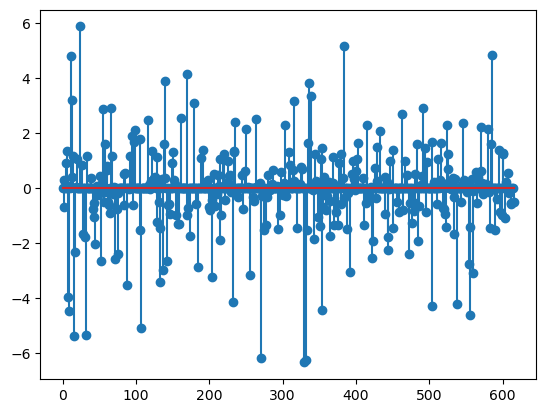

In [39]:
#TODO 9
W = logreg.coef_.ravel()
plt.stem(W)

In [26]:
# TODO 10
W_sort = np.argsort(np.abs(W))
name1 = xnames[W_sort[-1]]
name2 = xnames[W_sort[-2]]
print('Genes with largest W magnitude are %s and %s.' % (name1, name2))

Genes with largest W magnitude are ITSN1_N and BRAF_N.


In [30]:
#TODO 11
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)


precision = []
recall = []
f1 = []
error_rate = []

for Itr, Its in kf.split(X):
    Xtr = X[Itr, :]
    ytr = y[Itr]
    Xts = X[Its, :]
    yts = y[Its]

    scaler = StandardScaler()
    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)

    logreg = linear_model.LogisticRegression(C=1e5, solver='liblinear') 
    logreg.fit(Xtr1, ytr)
    yhat = logreg.predict(Xts1)

    measure = precision_recall_fscore_support(yts, yhat, average=None)
    precision_i = measure[0]
    recall_i = measure[1]
    f1_i = measure[2]

    precision.append(precision_i)
    recall.append(recall_i)
    f1.append(f1_i)
    error_rate.append(np.mean(yhat != yts))

precision = np.mean(precision)
recall = np.mean(recall)
f1 = np.mean(f1)
error_rate = np.mean(error_rate)

print('Mean Precision = %.3f' % precision)
print('Mean Recall = %.3f' % recall)
print('Mean f_1 = %.3f' % f1)
print('Mean Error Rate = %.3f' % error_rate)

Mean Precision = 0.958
Mean Recall = 0.958
Mean f_1 = 0.958
Mean Error Rate = 0.042


In [31]:
#TODO 12
ystr = df1['class'].values
u, y = np.unique(ystr, return_inverse=True)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
# TODO 13
 
from scipy.stats import sem
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
confusion = np.zeros((8,8))
acc = []
for ind in kf.split(X):
    itr, its = ind
    Xtr = X[itr,:]
    ytr = y[itr]
    Xts = X[its,:]
    yts = y[its]

    scaler = StandardScaler()
    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)

    logreg.fit(Xtr1, ytr)
    yhat = logreg.predict(Xts1)

    acc.append(np.mean(yhat == yts))
    confusion += confusion_matrix(yts, yhat)
confusion = confusion / confusion.sum(axis=1)
acc_mean = np.mean(acc)
acc_se = sem(acc)
print(np.array_str(confusion, precision=4, suppress_small=True))
print('Mean of accuracy = %.4f' % acc_mean)
print('SE of accuracy = %.4f' % acc_se)

[[0.9733 0.0222 0.0067 0.     0.     0.     0.     0.    ]
 [0.0267 0.963  0.     0.     0.0074 0.     0.     0.    ]
 [0.     0.0074 0.9867 0.     0.0074 0.     0.     0.    ]
 [0.0133 0.     0.     0.9852 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
Mean of accuracy = 0.9880
SE of accuracy = 0.0034


<StemContainer object of 3 artists>

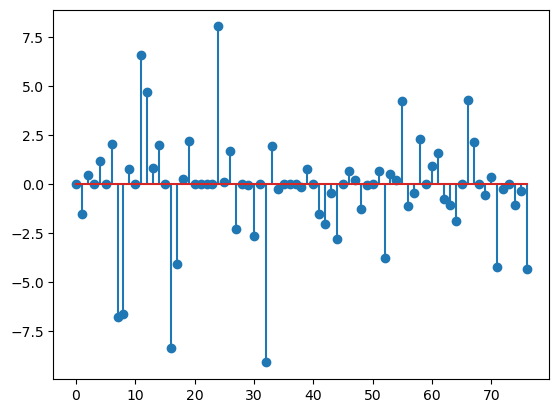

In [41]:
# TODO 14 
X1 = scaler.fit_transform(X)
logreg.fit(X1, y)
W = logreg.coef_[0,:]
plt.stem(W)

The mean accuracy rate for the optimal penalty rate 16.2378 is 0.9917 with SE 0.0029
The weight matrix is much sparser than that without l1 penalization.


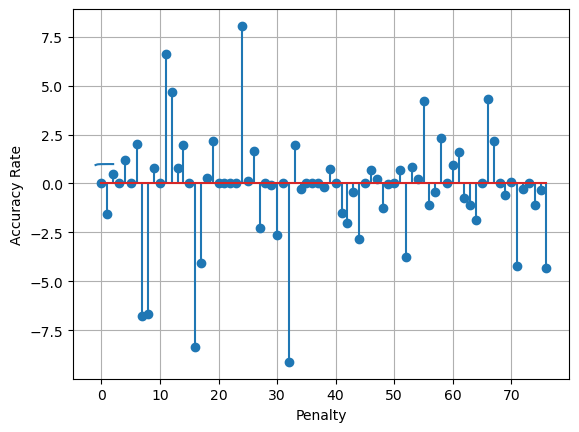

In [40]:
#TODO 15
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from scipy.stats import sem

nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)
C = np.logspace(-1, 2, 20)
acc_matrix = np.zeros((10, 20))
scaler = StandardScaler()  

for i, ind in enumerate(kf.split(X)):
    itr, its = ind
    Xtr = X[itr, :]
    ytr = y[itr]
    Xts = X[its, :]
    yts = y[its]

    Xtr1 = scaler.fit_transform(Xtr)
    Xts1 = scaler.transform(Xts)

    for j, c in enumerate(C):
        logreg = linear_model.LogisticRegression(C=c, penalty='l1', solver='liblinear')
        logreg.fit(Xtr1, ytr)

        yhat = logreg.predict(Xts1)

        acc_matrix[i, j] = np.mean(yhat == yts)

acc_mean = np.mean(acc_matrix, axis=0)
acc_se = sem(acc_matrix, axis=0)

plt.errorbar(np.log10(C), acc_mean, yerr=acc_se, ecolor='r')
plt.xlabel('Penalty')
plt.ylabel('Accuracy Rate')
plt.grid()

C_opt = C[np.argmax(acc_mean)]
acc_mean_opt = np.max(acc_mean)
acc_se_opt = acc_se[np.argmax(acc_mean)]

print('The mean accuracy rate for the optimal penalty rate %.4f is %.4f with SE %.4f' % (C_opt, acc_mean_opt, acc_se_opt))

X1 = scaler.fit_transform(X)

logreg = linear_model.LogisticRegression(C=C_opt, penalty='l1', solver='liblinear')
logreg.fit(X1, y)

W_c = logreg.coef_[0, :]
plt.stem(W_c)

print('The weight matrix is much sparser than that without l1 penalization.')
